<a href="https://www.kaggle.com/code/atripal2029/heart-disease-analytics?scriptVersionId=240864536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "../input/heart-disease-dataset/heart.csv"

heart = pd.read_csv(filepath)

In [3]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.shape

(1025, 14)

In [7]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
print(heart.duplicated().any())

True


In [10]:
heart = heart.drop_duplicates()

In [11]:
heart.shape

(302, 14)

In [12]:
# Correlation matrix

heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

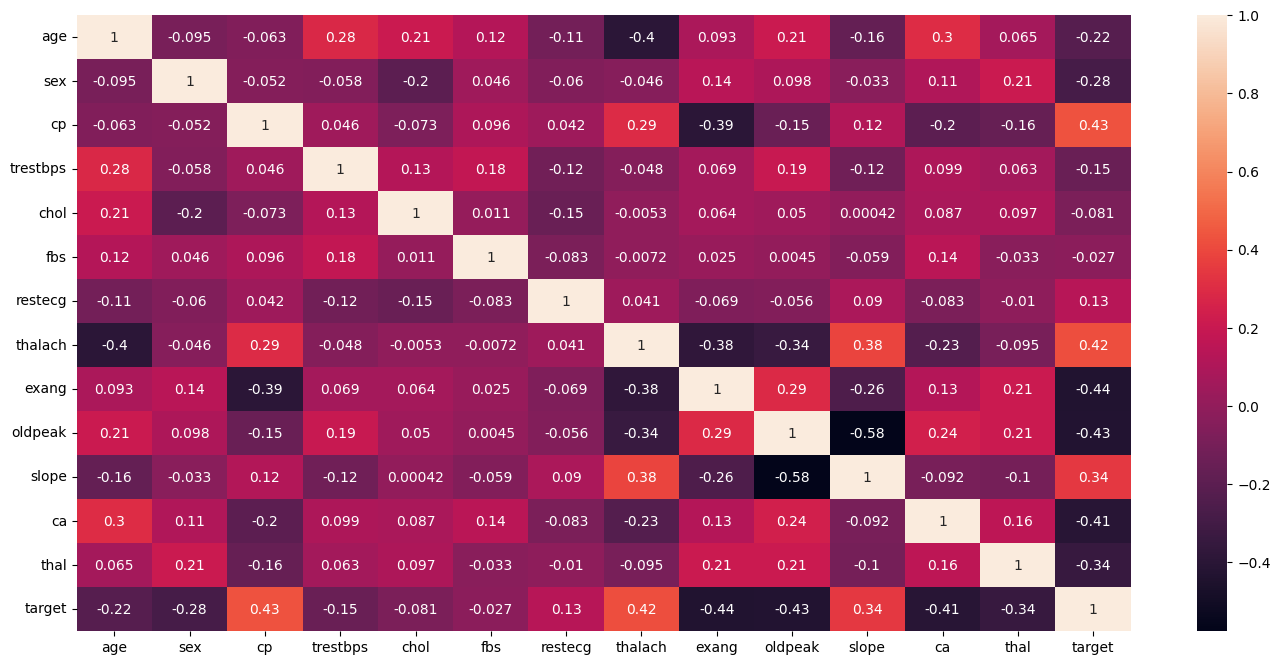

In [16]:
plt.figure(figsize=(17,8))
sns.heatmap(heart.corr(), annot=True)


In [17]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
# How many have heart disease?

heart['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

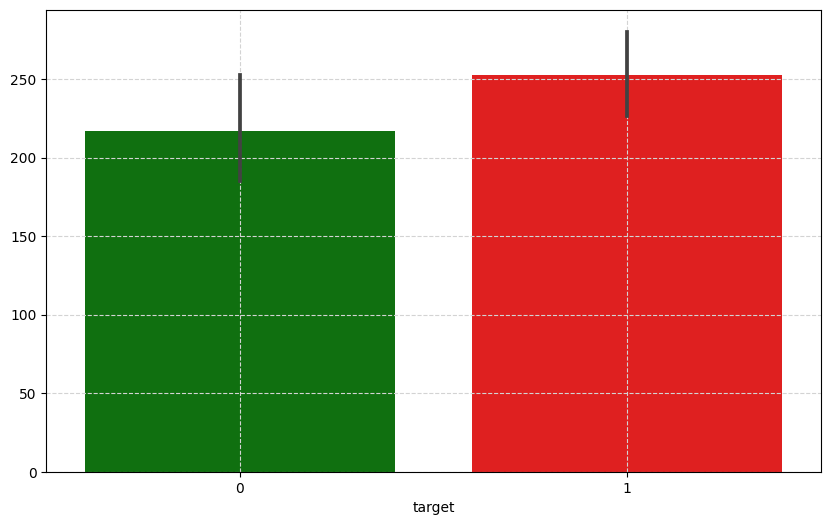

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=heart, y=heart.index, x='target', palette={1: 'red', 0: 'green'})
plt.grid(True, linestyle='--', color='lightgray')

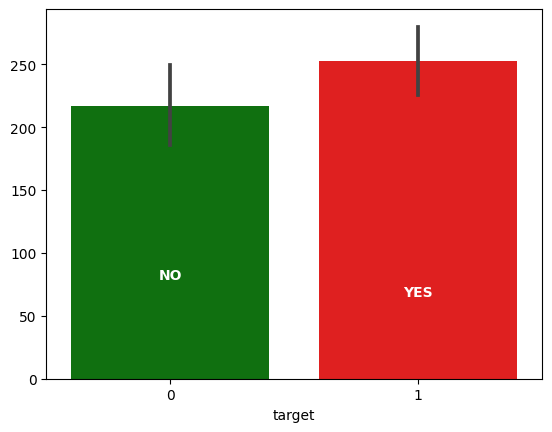

In [33]:

sns.barplot(data=heart, y=heart.index, x='target', palette={1: 'red', 0: 'green'})

for i, (label, value) in enumerate(heart['target'].value_counts().items()):
    text = 'NO' if label == 1 else 'YES'
    plt.text(
        i,                     # x position
        value / 2,            # y position (middle of the bar)
        text,
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

In [34]:
# Total genders have disease

heart['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

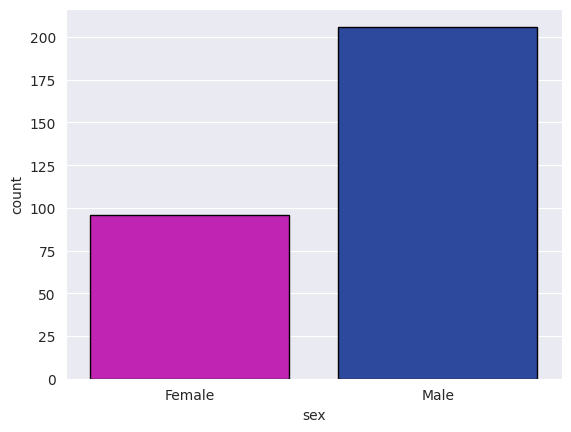

In [46]:
sns.countplot(data= heart, x='sex', palette={0: '#d90bc8', 1: '#1a40b0'}, edgecolor='black')
plt.xticks([0,1], ['Female','Male'])
sns.set_style('darkgrid')

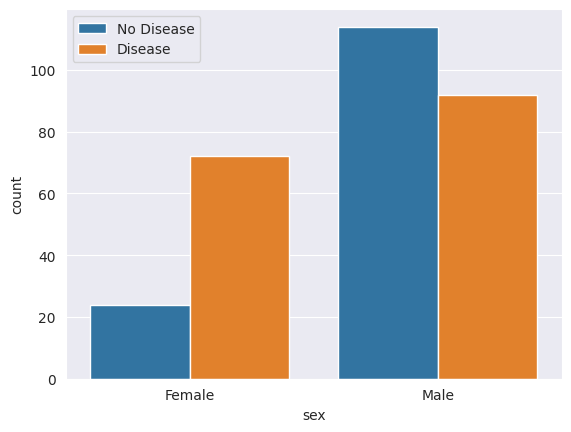

In [49]:
# Gender distribution according to target

sns.countplot(data=heart, x='sex', hue='target')
plt.xticks([0,1],['Female', 'Male'])
plt.legend(labels=['No Disease','Disease'])

/tmp/ipykernel_35/2587962999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['age'], bins=30)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age distribution')

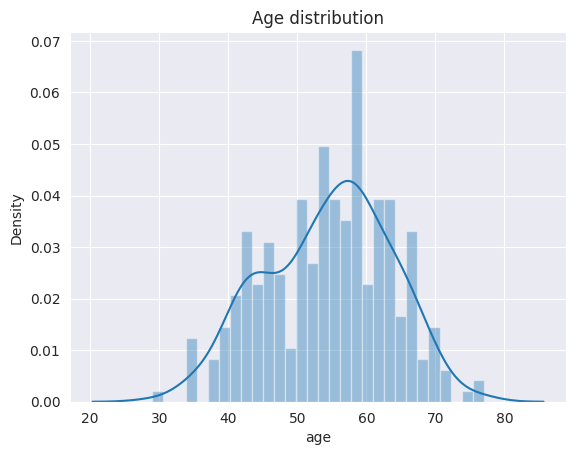

In [54]:
# age distribution

sns.distplot(heart['age'], bins=30)
plt.title("Age distribution")

([<matplotlib.axis.XTick at 0x783d6b5a0c50>,
 [Text(0, 0, 'Typical Angina'),
  Text(1, 0, 'Atypical Angina'),
  Text(2, 0, 'Non-Anginal Pain'),
  Text(3, 0, 'Asymptomatic')])

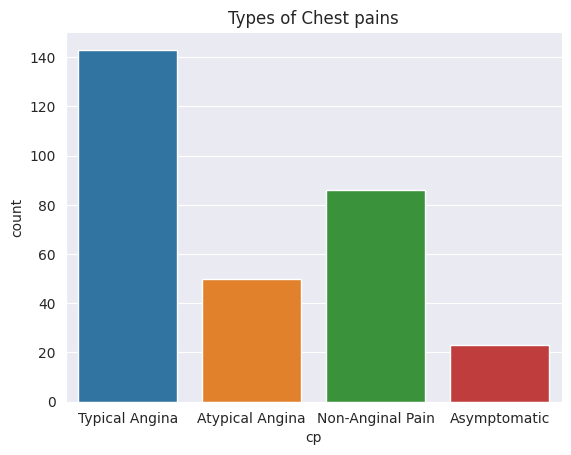

In [57]:
# Chest pain type
plt.title("Types of Chest pains")
sns.countplot(data=heart, x='cp')
plt.xticks([0,1,2,3],["Typical Angina","Atypical Angina","Non-Anginal Pain","Asymptomatic"])

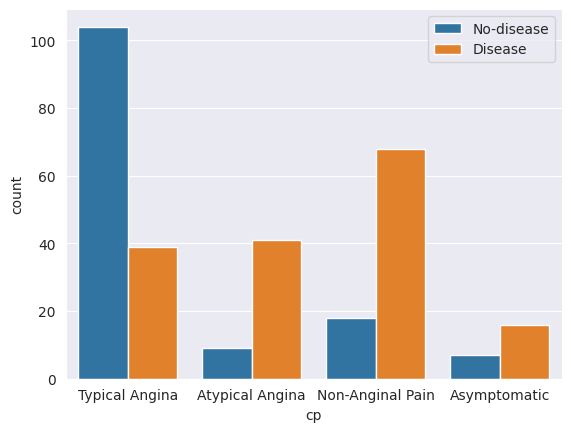

In [59]:
sns.countplot(data=heart, x='cp', hue='target')
plt.xticks([0,1,2,3],["Typical Angina","Atypical Angina","Non-Anginal Pain","Asymptomatic"])
plt.legend(labels=['No-disease','Disease'])

In [60]:
heart.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='fbs', ylabel='count'>

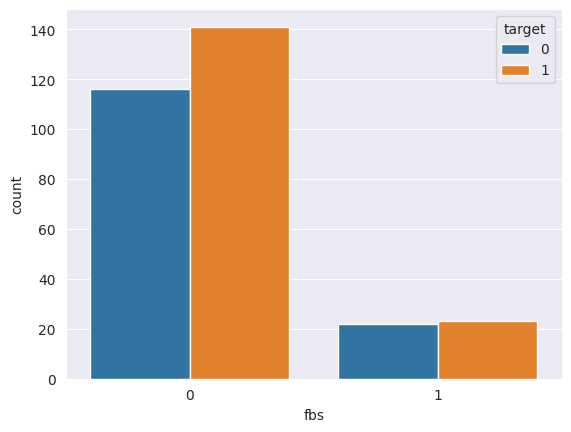

In [62]:
# fasting blood sugar

sns.countplot(data=heart, x='fbs', hue='target')

<Axes: >

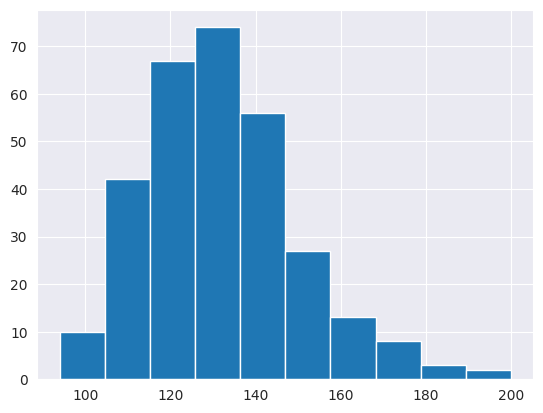

In [63]:
# Resting blood pressure distribution

heart['trestbps'].hist()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

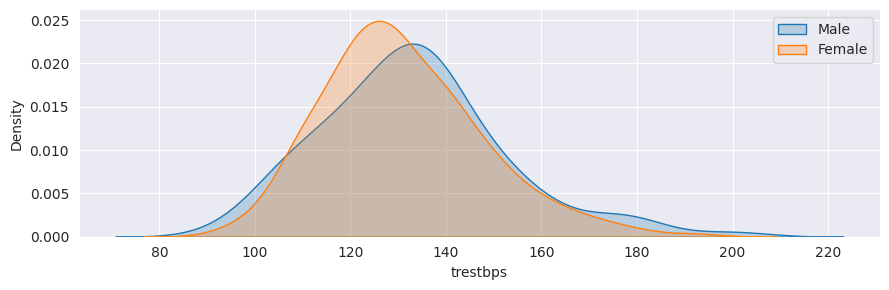

In [70]:
# compair resting blood pressure wrt sex
plt.figure(figsize=(10,10))
g = sns.FacetGrid(heart, hue='sex', aspect=3)
g.map(sns.kdeplot,'trestbps', fill=True)
plt.legend(labels=['Male','Female'])

<Axes: >

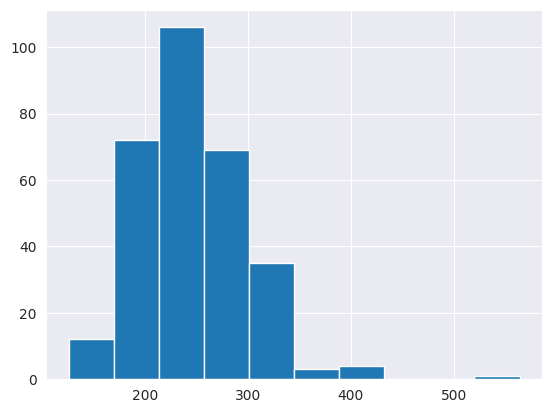

In [71]:
# Distribution of serum chlorestrol

heart['chol'].hist()

In [72]:
# Plot Continuos columns

heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [74]:
cat_val = []
cont_val = []

for column in heart.columns:
    if heart[column].nunique() <=10:
        cat_val.append(column)
    else:
        cont_val.append(column)

In [75]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [76]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

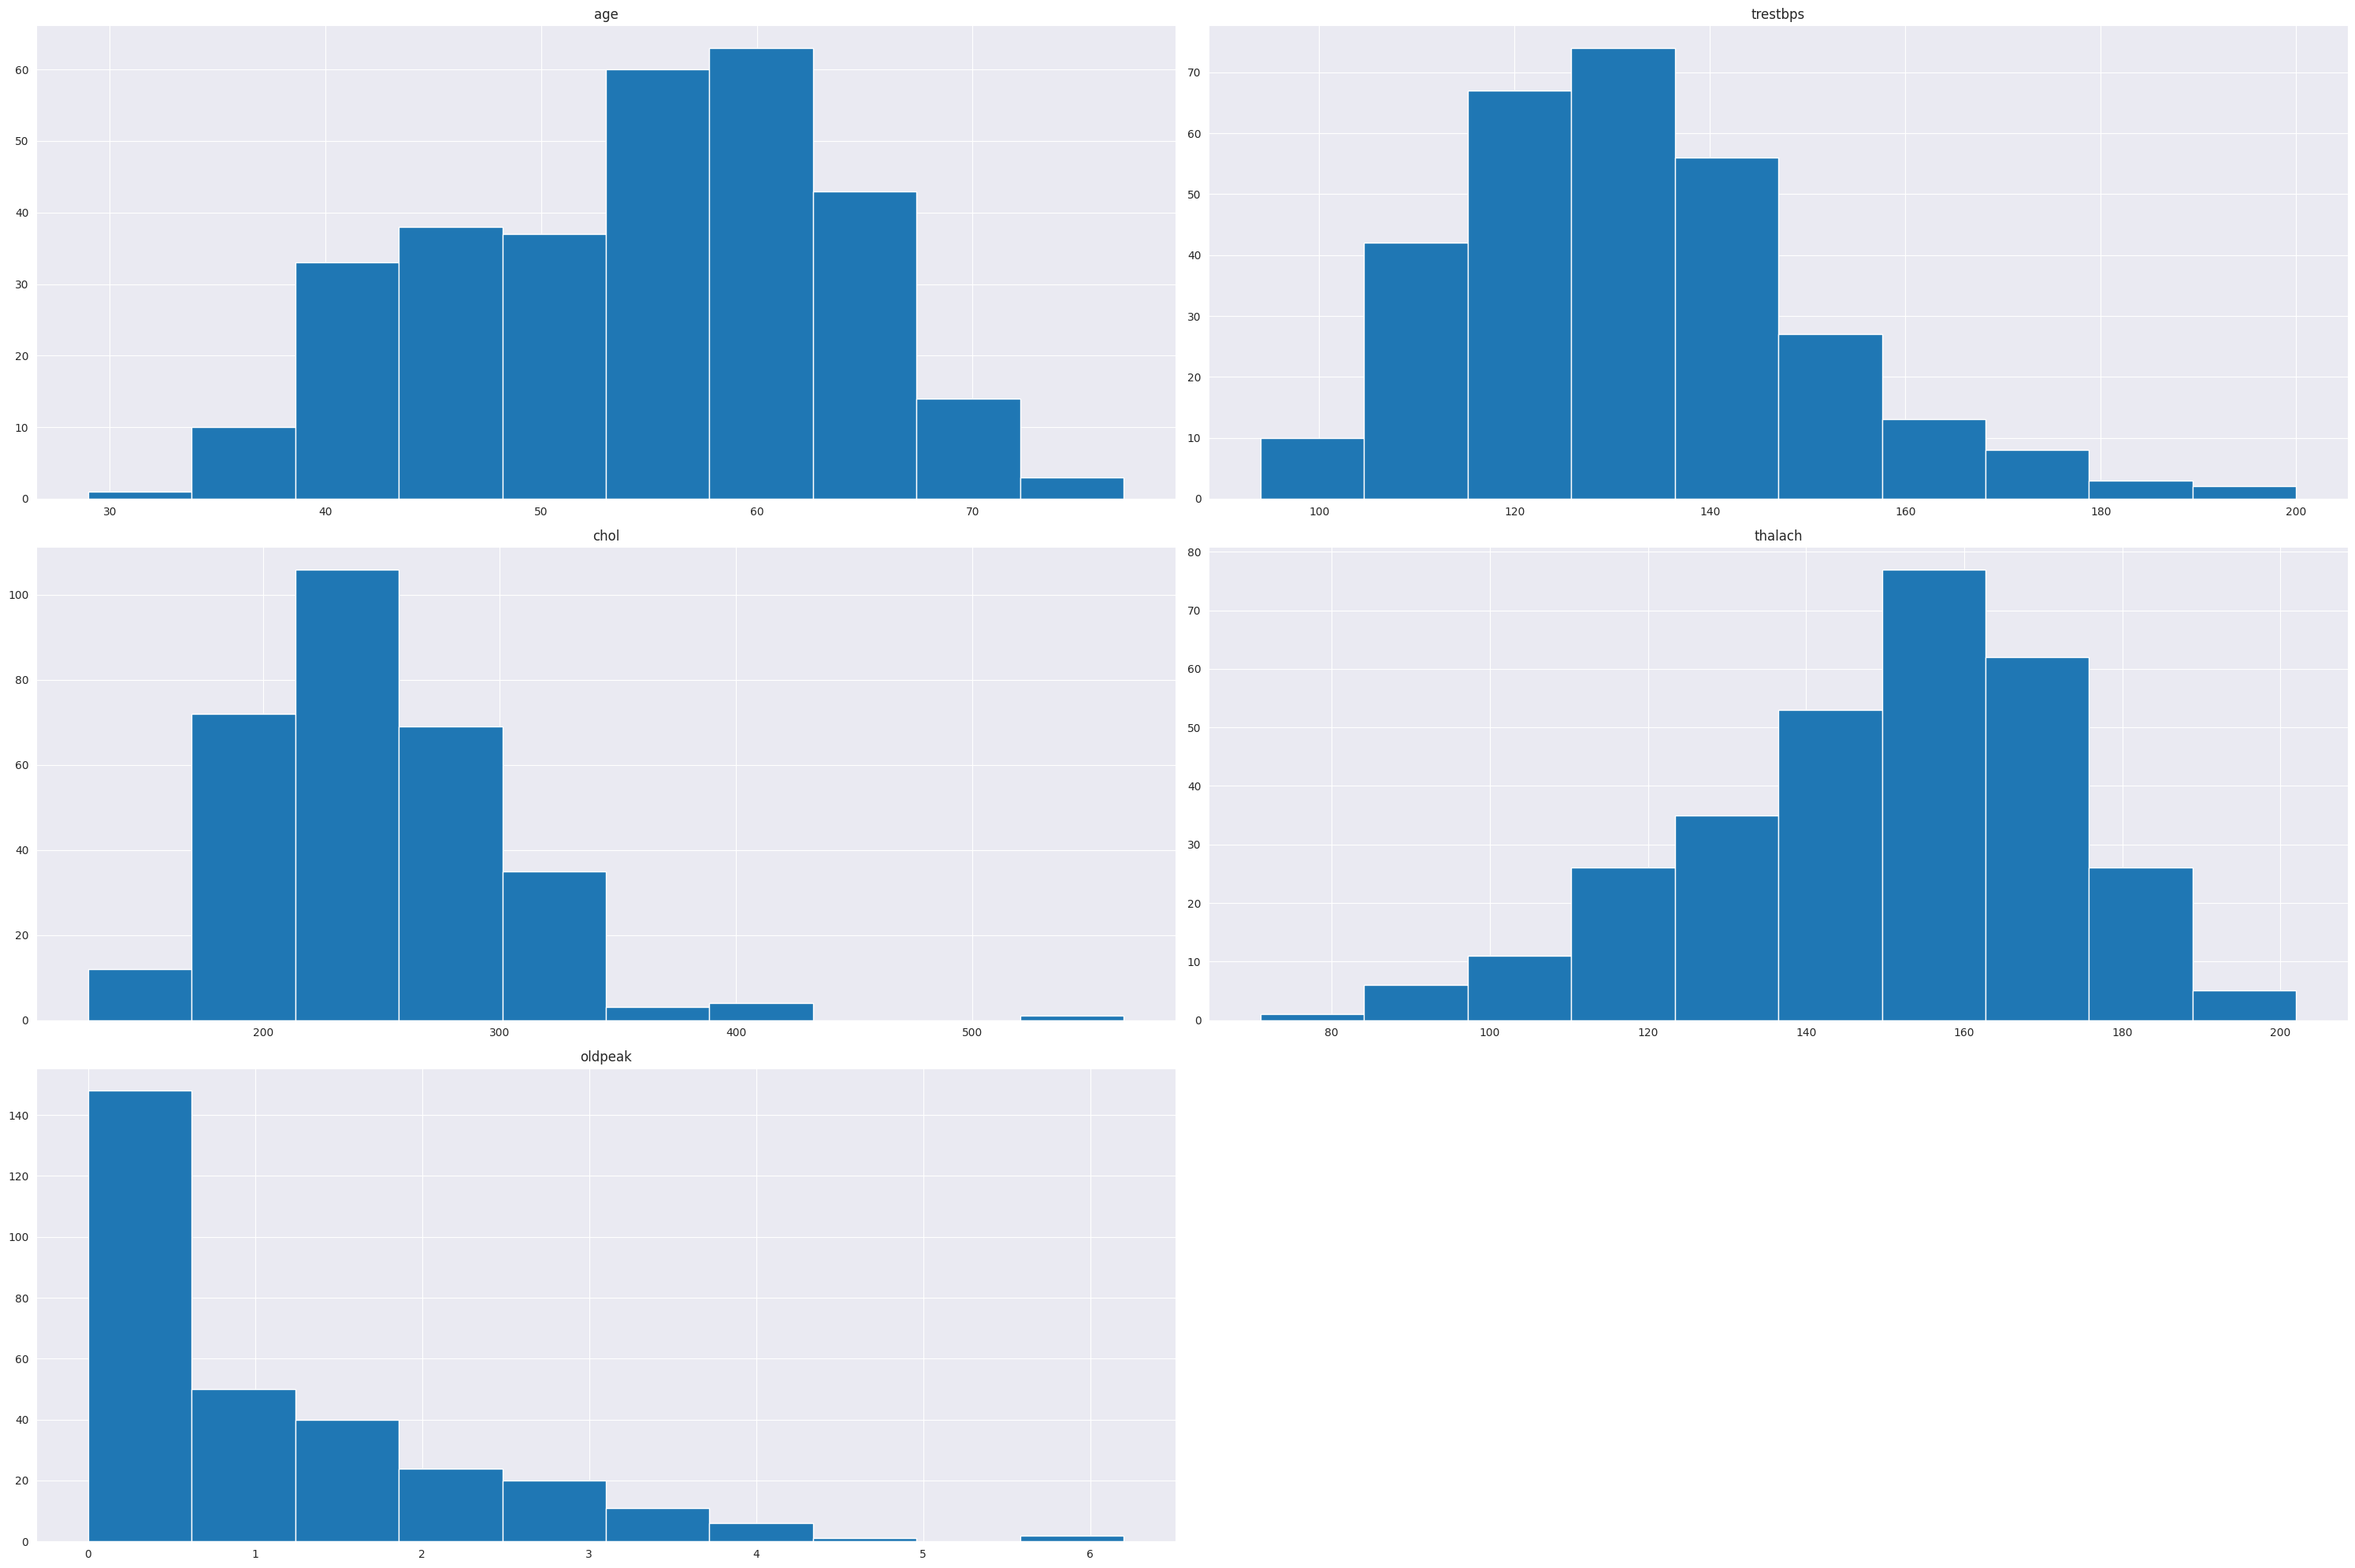

In [82]:
heart.hist(cont_val, figsize=(30,20))
plt.tight_layout()